# 第4章: 形態素解析
 On this page
30. 形態素解析結果の読み込み
31. 動詞
32. 動詞の原形
33. 「AのB」
34. 名詞の連接
35. 単語の出現頻度
36. 頻度上位10語
37. 「猫」と共起頻度の高い上位10語
38. ヒストグラム
39. Zipfの法則

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

- MeCabの使い方：https://testpy.hatenablog.com/entry/2016/10/04/010000

#### 準備：mecabのインストール

In [ ]:
!apt install aptitude

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-l

In [ ]:
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y

git is already installed at the requested version (1:2.17.1-1ubuntu0.7)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.9)
xz-utils is already installed at the requested version (5.2.2-1.3)
git is already installed at the requested version (1:2.17.1-1ubuntu0.7)
make is already installed at the requested version (4.1-9.1ubuntu1)
curl is already installed at the requested version (7.58.0-2ubuntu3.9)
xz-utils is already installed at the requested version (5.2.2-1.3)
The following NEW packages will be installed:
  file libmagic-mgc{a} libmagic1{a} libmecab-dev libmecab2{a} mecab mecab-ipadic{a} mecab-ipadic-utf8 mecab-jumandic{a} mecab-jumandic-utf8{a} mecab-utils{a} 
The following packages will be REMOVED:
  libnvidia-common-440{u} 
0 packages upgraded, 11 newly installed, 1 to remove and 35 not upgraded.
Need to get 29.3 MB of archives. After unpacking 282 MB will be used.
Get: 1 http://archive.ubuntu

In [ ]:
!pip install mecab-python3==0.7

     |████████████████████████████████| 51kB 2.2MB/s 
  Created wheel for mecab-python3: filename=mecab_python3-0.7-cp36-cp36m-linux_x86_64.whl size=155492 sha256=cd6524e7da6928650a3f84cdf7652d79bdd93c1436016fda0cea6fc17a04f447
  Stored in directory: /root/.cache/pip/wheels/4c/07/3a/5f22ccc9f381f3bc01fa023202061cd1e0e9af855292f005dd
Successfully built mecab-python3


#### 準備：neko.txtの形態素解析

In [ ]:
import MeCab
t = MeCab.Tagger('-Ochasen')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
with open('drive/My Drive/NLP100knock/data/chap4/neko.txt') as indata:
    text = indata.read()
with open('drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab.txt', mode='w') as outdata:
    outdata.write(t.parse(text))

## 30.形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

- マッピング型とは辞書のこと：https://qiita.com/nakasan/items/bc9ba8eb57f5b7a22698#%E3%83%9E%E3%83%83%E3%83%94%E3%83%B3%E3%82%B0%E5%9E%8B
- 複数のキーを持たせる：https://qiita.com/tag1216/items/b2765e9e87025c01e57f

In [ ]:
import re

In [ ]:
def get_morph(infile):
    
    #ファイルを読み込んで区切り文字で分割してリスト化
    with open(infile, mode='r') as infile:
        infile_list=[re.split(r'[\t\-\n]',infile_line) for infile_line in infile]
    
    #形態素解析の結果を辞書のリストにして格納
        morph=[]
        for i,data in enumerate(infile_list):
             if data != infile_list[len(infile_list)-1]:
                    morph_temp={'surface':data[0], 'base':data[2], 'pos':data[3], 'pos1':data[4]}
                    morph.append(morph_temp)
    
    return morph

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'

In [ ]:
get_morph(infile)[:10]

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '特殊・ダ', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '五段・ラ行アル', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'}]

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

## 31.動詞
動詞の表層形をすべて抽出せよ．

In [ ]:
def get_verbSurfaces(morphs):
    surfaces=[morph['surface'] for morph in morphs if morph['pos']=='動詞']
    
    return surfaces

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

In [ ]:
get_verbSurfaces(morphs)[:5]

['生れ', 'つか', 'し', '泣い', 'し']

##### 過程

In [ ]:
surfaces=[]
for morph in morphs:
    if morph['pos']=='動詞':
        surfaces.append(morph['surface'])

In [ ]:
surfaces[:5]

['生れ', 'つか', 'し', '泣い', 'し']

## 32.動詞の原形
動詞の原形をすべて抽出せよ．

In [ ]:
def get_verbBase(morphs):
    bases=[morph['base'] for morph in morphs if morph['pos']=='動詞']
    
    return bases

In [ ]:
get_verbBase(morphs)[:5]

['生れる', 'つく', 'する', '泣く', 'する']

## 33.「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

- 形態素解析ツールの品詞体系：http://www.unixuser.org/~euske/doc/postag/

In [ ]:
def get_unionNorns(morphs):
    
    #pos1が連体化であるものとその前後を取得
    unionNorns = [morphs[i-1]['surface']+morphs[i]['surface']+morphs[i+1]['surface'] 
                  for i,morph in enumerate(morphs) 
                  if morph['pos1']=='連体化']
    
    return unionNorns

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

In [ ]:
get_unionNorns(morphs)[-5:]

['年の間', '自然の力', '水の中', '座敷の上', '不可思議の太平']

#### 過程

In [ ]:
#きっとこういうことだ
# {'surface': '一樹', 'base': '一樹', 'pos': '名詞', 'pos1': '一般'},
#{'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'},
#{'surface': '蔭', 'base': '蔭', 'pos': '名詞', 'pos1': '一般'},
#pos1が連体化？

In [ ]:
no = [morph['surface'] for morph in morphs if morph['pos1']=='連体化']

In [ ]:
no[:5]

['の', 'の', 'の', 'の', 'の']

In [ ]:
union_norns=[]
for i,morph in enumerate(morphs):
    if morph['pos1']=='連体化':
        union_norns.append(morphs[i-1]['surface']+morphs[i]['surface']+morphs[i+1]['surface'])


In [ ]:
union_norns[:5]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中']

## 34.名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

- 最長一致とは：https://wa3.i-3-i.info/word17055.html

In [ ]:
#連続していたらそいつら全部とる
#名詞1名詞2名詞3名詞4となっていた場合1~4まで全部とる

In [ ]:
def get_nornsList(morphs):

#変数設定    
    nornsList=[]
    norns=''
    pos=''

    for i in range(0,len(morphs)):
        
        #名詞だった場合連続する名詞群をnornsに順次格納
        if morphs[i]['pos']=='名詞':
            norns = ''.join([norns,morphs[i]['surface']])
            pos=morphs[i]['pos']

        #名詞の連続が途切れたタイミングでリストに格納し、
        #1つの名詞群とし、変数を初期化
        elif morphs[i]['pos']!='名詞' and pos=='名詞':
            nornsList.append(norns)
            norns =''
            pos=''

        else:
            norns =''
            pos=''
    
    return nornsList

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

In [ ]:
get_nornsList(morphs)[:10]

['一', '吾輩', '猫', '名前', 'どこ', '見当', '何', '所', 'ニャーニャー', 'いた事']

#### 過程

In [ ]:
test=['a','b','b','b','b','c','d','d','d','e']

In [ ]:
a=''
b=''
c=''
d=[]

for i in range(0,len(test)):
    if b==test[i]:
        a=''.join([a,b])
        c=test[i]
    elif b!=test[i]:
        if c==b and c!='':
            a=''.join([a,c])
            d.append(a)
            a=''
        b=test[i]
    else:
        pass
    
if c==b:
    a=''.join([a,c])
    d.append(a)
    
    
#辞書型でサンプルを作成するべきだった。。。

In [ ]:
d

['bbbb', 'ddd']

In [ ]:
norns_list=[]
norns=''
pos=''

count=0

for i in range(0,len(morphs)):
    if morphs[i]['pos']=='名詞':
        norns = ''.join([norns,morphs[i]['surface']])
        pos=morphs[i]['pos']
        
    elif morphs[i]['pos']!='名詞' and pos=='名詞':
        norns_list.append(norns)
        norns =''
        pos=''
        
    else:
        norns =''
        pos=''


## 35.単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ

In [ ]:
from collections import Counter

In [ ]:
def get_wordFreq(morphs):

    surface_list=[morph['surface'] for morph in morphs if morph['pos']!='記号' ]
    wordFreq = Counter(surface_list)
    wordFreq=sorted(wordFreq.items(), key=lambda x:x[1],reverse=True)
    
    return wordFreq

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

In [ ]:
get_wordFreq(morphs)[:10]

[('の', 9194),
 ('て', 6873),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('と', 5515),
 ('が', 5339),
 ('た', 3989),
 ('で', 3813),
 ('も', 2479)]

## 36.頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize_matplotlib

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
from collections import Counter

In [ ]:
def get_wordFreqVisual(morphs):

    #単語の頻度上位10位を取得
    surface_list=[morph['surface'] for morph in morphs if morph['pos']!='記号' ]
    wordFreq = Counter(surface_list)
    wordFreq=sorted(wordFreq.items(), key=lambda x:x[1],reverse=True)
    target_words=get_wordFreq(morphs)[:10]

    #ビジュアライズ
    x_axis = [target_word[0] for target_word in target_words]
    y_axis = [target_word[1] for target_word in target_words]
    plt.figure(10.5)
    plt.bar(x_axis, y_axis)
    plt.show()

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

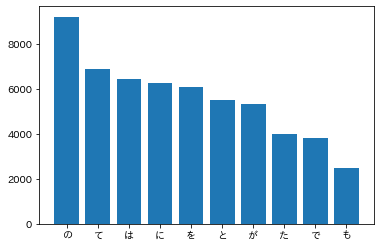

In [ ]:
get_wordFreqVisual(morphs)

## 37.「猫」と共起頻度の高い上位10語
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

共起とは自然言語処理の分野において、「任意の文書や文に、ある文字列とある文字列が同時に出現すること」をいいます。 例えば選挙に関する話題のなかでは、「選挙」という言葉と「出馬」という文字列は同時に出現する場合が多いことが挙げられます。 この共起する単語の割合が高い場合を「共起度が高い」と表現します。

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import collections

In [ ]:
#猫と同時に使われる頻度の高い単語とその頻度のグラフを作成する
def get_coFreqs(morphs,word):

    co=[]
    for i in range(0,len(morphs)):
        if morphs[i]['surface']==word:
            co.append(morphs[i-1]['base'])
            co.append(morphs[i+1]['base'])

    #記号の集合を取得
    symbol=set([morph['base'] for morph in morphs if morph['pos']=='記号'])

    #猫と共起した単語を頻度準備並び替え、記号を除いた上位10単語を格納
    coFreqs=collections.Counter(co)
    coFreqs=sorted(coFreqs.items(), key=lambda x:x[1],reverse=True)
    target_coFreqs=[coFreq for coFreq in coFreqs if coFreq[0] not in symbol]
    target_coFreqs=target_coFreqs[:10]

    #ヴィジュアライズ
    x_axis = [target_coFreq[0] for target_coFreq in target_coFreqs]
    y_axis = [target_coFreq[1] for target_coFreq in target_coFreqs]
    plt.figure(10.5)
    plt.bar(x_axis, y_axis)
    plt.show()

        

In [ ]:
word="猫"

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

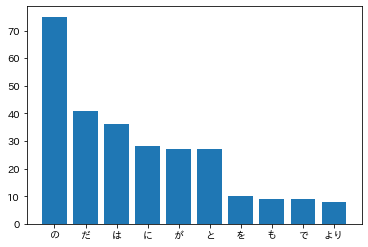

In [ ]:
get_coFreqs(morphs,word)

#### 過程

In [ ]:
target_coFreqs=coFreqs[:12]
target_coFreqs

In [ ]:
symbol=set([morph['base'] for morph in morphs if morph['pos']=='記号'])
# for morph in morphs: 
#     if morph['pos']=='記号':
#         symbol.append(morph['base'])

## 38.ヒストグラム
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
%matplotlib inline

In [ ]:
def get_hist(morphs):
  #単語の頻度を取得
  surface_list=[morph['base'] for morph in morphs if morph['pos']!='記号' ]
  wordFreq = Counter(surface_list)
  wordFreq=sorted(wordFreq.items(), key=lambda x:x[1],reverse=True)
  target_words=get_wordFreq(morphs)
  target_hist=np.array([target_words[i][1] for i in range(0,len(target_words))])


  plt.figure(15.10)
  plt.hist(target_hist,bins=50)
  plt.ylabel('単語の頻度',fontsize=20)
  plt.xlabel('単語の種類',fontsize=20)
  plt.show()

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

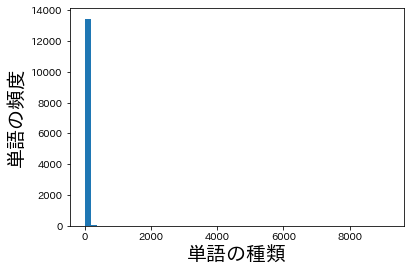

In [ ]:
get_hist(morphs)

#### 過程

In [ ]:
surface_list=[morph['base'] for morph in morphs if morph['pos']!='記号' ]
wordFreq = Counter(surface_list)
wordFreq=sorted(wordFreq.items(), key=lambda x:x[1],reverse=True)
target_words=get_wordFreq(morphs)
target_hist=[target_words[i][1] for i in range(0,len(target_words))]

In [ ]:
target_hist[:10]

[9194, 6873, 6422, 6268, 6071, 5515, 5339, 3989, 3813, 2479]

## 39.Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ

両対数グラフ：https://detail-infomation.com/semi-log-plot-and-log-log-plot/
<br>matplotlibでヒストグラム：https://yolo.love/matplotlib/hist/#i-7

In [ ]:
from scipy.stats import rankdata
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np
%matplotlib inline

In [ ]:
def get_zppf(morphs):
  #単語の頻度とそのランクを取得
  surface_list=[morph['base'] for morph in morphs if morph['pos']!='記号' ]
  wordFreq = Counter(surface_list)
  wordFreq=sorted(wordFreq.items(), key=lambda x:x[1],reverse=True)
  target_words=get_wordFreq(morphs)
  target_y=np.array([target_words[i][1] for i in range(0,len(target_words))])
  target_x=(len(rankdata(target_y)) - rankdata(target_y) + 1).astype(float)

  #ヴィジュアライズ
  plt.figure(15.10)
  plt.xscale('log')
  plt.yscale('log')
  plt.scatter(target_x,target_y)
  plt.ylabel('単語の頻度',fontsize=20)
  plt.xlabel('単語の種類',fontsize=20)
  plt.show()

In [ ]:
infile = 'drive/My Drive/NLP100knock/data/chap4/neko.txt.mecab'
morphs=get_morph(infile)

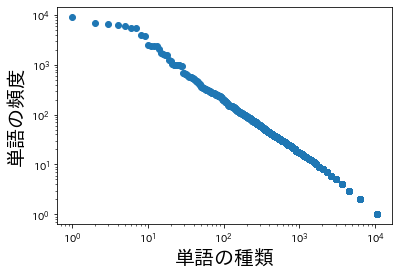

In [ ]:
get_zppf(morphs)

#### 過程

In [ ]:
surface_list=[morph['base'] for morph in morphs if morph['pos']!='記号' ]
wordFreq = Counter(surface_list)
wordFreq=sorted(wordFreq.items(), key=lambda x:x[1],reverse=True)
target_words=get_wordFreq(morphs)

target_y=np.array([target_words[i][1] for i in range(0,len(target_words))])
target_x=(len(rankdata(target_y)) - rankdata(target_y) + 1).astype(float)

In [ ]:
target_x

array([1.0000e+00, 2.0000e+00, 3.0000e+00, ..., 1.0469e+04, 1.0469e+04,
       1.0469e+04])

In [ ]:
target_words[:10]

[('の', 9194),
 ('て', 6873),
 ('は', 6422),
 ('に', 6268),
 ('を', 6071),
 ('と', 5515),
 ('が', 5339),
 ('た', 3989),
 ('で', 3813),
 ('も', 2479)]

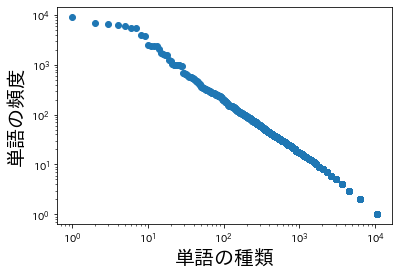

In [ ]:
plt.figure(15.10)
plt.xscale('log')
plt.yscale('log')

plt.scatter(target_x,target_y)
plt.ylabel('単語の頻度',fontsize=20)
plt.xlabel('単語の種類',fontsize=20)
plt.show()